In [150]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.svm import NuSVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
data=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data")

In [106]:
data.head()

,T,2,8,3,5,1,8.1,13,0,6,6.1,10,8.2,0.1,8.3,0.2,8.4
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


In [107]:
data.rename(columns={'2':'x-box','8':'y-box','3':'width','5':'high','1':'onpix','8.1':'x-bar','13':'y-bar','0':'x2bar','6':'y2bar','6.1':'xybar','10':'x2ybr','8.2':'xy2br','0.1':'x-ege','8.3':'xegvy','0.2':'y-ege','8.4':'yegvx','T':'Letter'},inplace=True)

In [108]:
data.head()

,Letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
1,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
2,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
3,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
4,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


## Data Analytics

### Line Plot

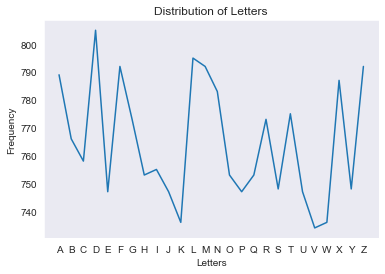

In [156]:
val_counts=[]
letters=list(data['Letter'])
uniqletters=list(data['Letter'].unique())
for x in range(len(uniqletters)):
    val_counts.append([uniqletters[x],letters.count(letters[x])])
val_counts
val_counts.sort(key=lambda val_counts: val_counts[0])
val_counts
x=[]
y=[]
for i in range(len(val_counts)):
    x.append(val_counts[i][0])
    y.append(val_counts[i][1])

plt.plot(x,y)
plt.xlabel('Letters')
plt.ylabel('Frequency')
plt.title('Distribution of Letters')
plt.show()

### Histogram

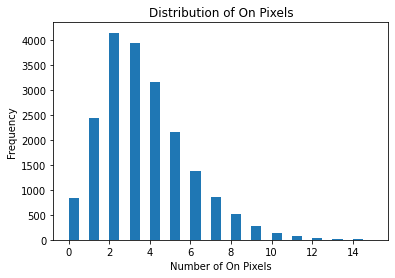

In [152]:
plt.hist(data['onpix'], bins=30)
plt.xlabel('Number of On Pixels')
plt.ylabel('Frequency')
plt.title('Distribution of On Pixels')
plt.show()

### Violin Plot

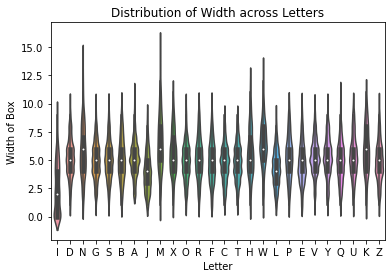

In [153]:
sns.violinplot(x='Letter', y='width', data=data)
plt.xlabel('Letter')
plt.ylabel('Width of Box')
plt.title('Distribution of Width across Letters')
plt.show()

### Pair Plot

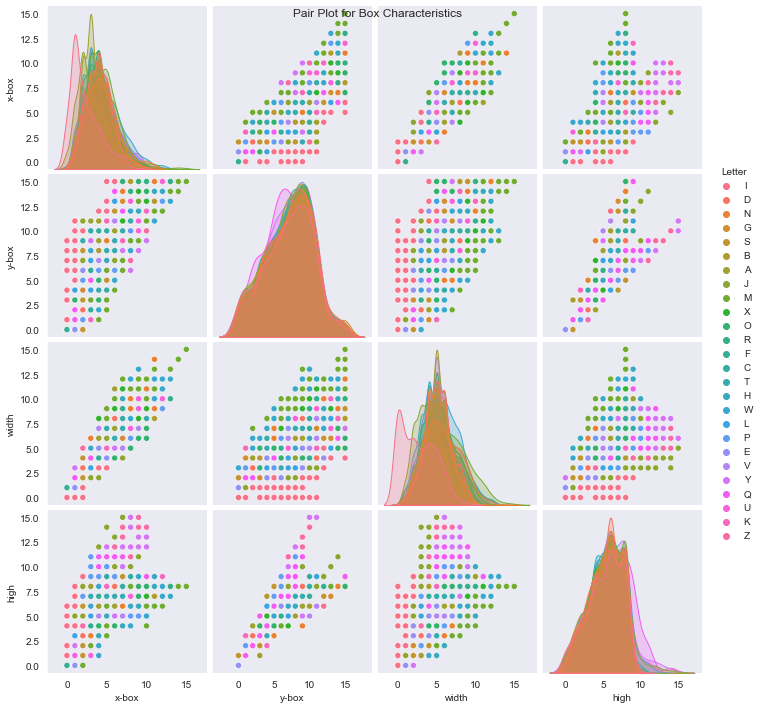

In [155]:
import seaborn as sns
sns.set_style('dark')
sns.pairplot(data=data, vars=['x-box', 'y-box', 'width', 'high'], hue='Letter')
plt.suptitle('Pair Plot for Box Characteristics')
plt.show()

### Preprocessing

In [123]:
data.to_csv('G:/dataset_for_svm.csv')

In [109]:
X=data.iloc[:,1:]
y=data.iloc[:,0:1]
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)

In [110]:
clf=SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
y_pred
score=accuracy_score(y_test,y_pred)
score

0.8478333333333333

In [111]:
data_sample=data.sample(frac=0.1)
data_sample

,Letter,x-box,y-box,width,high,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
1967,Y,5,6,5,4,3,5,9,1,7,9,10,6,1,11,3,5
1675,M,2,3,4,1,2,8,6,3,4,9,6,7,6,5,1,7
5913,E,9,15,6,9,5,7,7,4,4,11,5,9,3,9,8,11
18411,L,5,10,7,7,4,5,4,3,8,6,2,8,1,6,3,6
9055,B,2,1,2,1,2,7,7,7,5,6,6,7,1,8,7,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3273,F,3,8,3,6,1,1,12,4,5,12,11,8,0,8,2,6
2076,E,2,4,4,3,2,6,8,2,8,11,7,9,2,8,4,8
8654,W,2,0,2,1,1,7,8,3,0,7,8,8,6,10,0,8
19692,G,3,4,4,6,2,8,8,8,7,6,7,8,2,7,6,11


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Letter  19999 non-null  object
 1   x-box   19999 non-null  int64 
 2   y-box   19999 non-null  int64 
 3   width   19999 non-null  int64 
 4   high    19999 non-null  int64 
 5   onpix   19999 non-null  int64 
 6   x-bar   19999 non-null  int64 
 7   y-bar   19999 non-null  int64 
 8   x2bar   19999 non-null  int64 
 9   y2bar   19999 non-null  int64 
 10  xybar   19999 non-null  int64 
 11  x2ybr   19999 non-null  int64 
 12  xy2br   19999 non-null  int64 
 13  x-ege   19999 non-null  int64 
 14  xegvy   19999 non-null  int64 
 15  y-ege   19999 non-null  int64 
 16  yegvx   19999 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


### Sampling and Model Training

In [117]:
best_accuracy_list=[]
best_kernel_list=[]
best_nu_list=[]
best_epsilon_list=[]
all_accuracy_list=[]
for i in range(10):
    data_sample=data.sample(frac=0.1)
    X=data_sample.iloc[:,1:]
    y=data_sample.iloc[:,0:1]
    x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=42)
    kernel_list=['rbf','sigmoid','poly','linear']
    best_accuracy=0
    best_kernel="linear"#initially assumed,but if accuracy greater than best accuracy,will change it.
    best_nu=0#initially assumed
    best_epsilon=0#initially assumed
    sample_accuracy_list=[]
    for j in range(1000):
        kernel_choosen=random.choice(kernel_list)
        nu_choosen=random.uniform(0,0.1)
        epsilon_choosen=random.random()
        clf=NuSVC(kernel=kernel_choosen,nu=nu_choosen)
        try:
            clf.fit(x_train,y_train)
            y_pred=clf.predict(x_test)
            accuracy_computed=accuracy_score(y_test,y_pred)
            sample_accuracy_list.append(accuracy_computed)
            if(accuracy_computed>=best_accuracy):
                best_accuracy=accuracy_computed
                best_nu=nu_choosen
                best_epsilon=epsilon_choosen
                best_kernel=kernel_choosen
        except:
            j=j-1
    best_accuracy_list.append(best_accuracy)
    best_nu_list.append(best_nu)
    best_epsilon_list.append(best_epsilon)
    best_kernel_list.append(best_kernel)
    all_accuracy_list.append(sample_accuracy_list)

for i in range(len(best_accuracy_list)):
    print('accuracy: ',best_accuracy_list[i])
    print('nu: ',best_nu_list[i])
    print('epsilon: ',best_epsilon_list[i])
    print('kernel: ',best_kernel_list[i])
    print('------------')

accuracy:  0.8716666666666667
nu:  0.05622152666650596
epsilon:  0.7873075348938985
kernel:  rbf
------------
accuracy:  0.8666666666666667
nu:  0.007507660228637159
epsilon:  0.04957246935540194
kernel:  rbf
------------
accuracy:  0.84
nu:  0.03139366752641322
epsilon:  0.03202898936407128
kernel:  rbf
------------
accuracy:  0.88
nu:  0.03528826589166748
epsilon:  0.2508507709183668
kernel:  rbf
------------
accuracy:  0.8533333333333334
nu:  0.0526340569760847
epsilon:  0.6065712644649711
kernel:  rbf
------------
accuracy:  0.85
nu:  0.006961468307149832
epsilon:  0.19654552838307726
kernel:  rbf
------------
accuracy:  0.8716666666666667
nu:  0.0028402132434773965
epsilon:  0.5210188868665189
kernel:  rbf
------------
accuracy:  0.8616666666666667
nu:  0.08827633878382779
epsilon:  0.07089610191340523
kernel:  rbf
------------
accuracy:  0.8766666666666667
nu:  0.0942243677488512
epsilon:  0.008999016650604985
kernel:  rbf
------------
accuracy:  0.85
nu:  0.022475233472456294
ep

### Convergence Graph

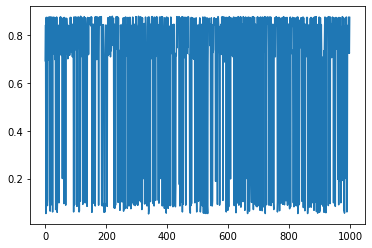

In [120]:
index_of_max_accuracy=best_accuracy_list.index(max(best_accuracy_list))
accuracy_of_best_sample=all_accuracy_list[index_of_max_accuracy]
indices=list(range(0,1000))
x1=np.array(indices)
y1=np.array(accuracy_of_best_sample)
plt.plot(x1,y1)

### Final Results

In [121]:
sample_list=['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10']
dict={'Sample':sample_list,'Accuaracy':best_accuracy_list,'Kernel':best_kernel_list,'Nu':best_nu_list,'Epsilon':best_epsilon_list}
final_table=pd.DataFrame(dict)
final_table

,Sample,Accuaracy,Kernel,Nu,Epsilon
0,S1,0.871667,rbf,0.056222,0.787308
1,S2,0.866667,rbf,0.007508,0.049572
2,S3,0.840000,rbf,0.031394,0.032029
3,S4,0.880000,rbf,0.035288,0.250851
4,S5,0.853333,rbf,0.052634,0.606571
5,S6,0.850000,rbf,0.006961,0.196546
6,S7,0.871667,rbf,0.002840,0.521019
7,S8,0.861667,rbf,0.088276,0.070896
8,S9,0.876667,rbf,0.094224,0.008999
9,S10,0.850000,rbf,0.022475,0.110651


In [122]:
final_table.to_csv('G:/results.csv')